In this project we will visualize the the exchange rate of the Euro to US dollar from 1999 to 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
#exchange_rates = exchange_rates.replace("-", float('nan'))
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.rename({"[US dollar ]": "US_dollar", 'Period\\Unit:':'time' }, axis=1, inplace=True)

#rename the column to analyze easily 
exchange_rates.head()

,time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.sort_values('time', inplace = True)

In [5]:
exchange_rates['US_dollar'].value_counts(dropna=False)

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_us = exchange_rates[['time', 'US_dollar']]
euro_to_us.head()

,time,US_dollar
5698,1999-01-04,1.1789
5697,1999-01-05,1.1790
5696,1999-01-06,1.1743
5695,1999-01-07,1.1632
5694,1999-01-08,1.1659


In [7]:
euro_to_us = euro_to_us[euro_to_us['US_dollar'] != '-']
euro_to_us['US_dollar'].astype(float)

5698    1.1789
5697    1.1790
5696    1.1743
5695    1.1632
5694    1.1659
         ...  
4       1.2296
3       1.2271
2       1.2338
1       1.2276
0       1.2250
Name: US_dollar, Length: 5637, dtype: float64

<IPython.core.display.Javascript object>


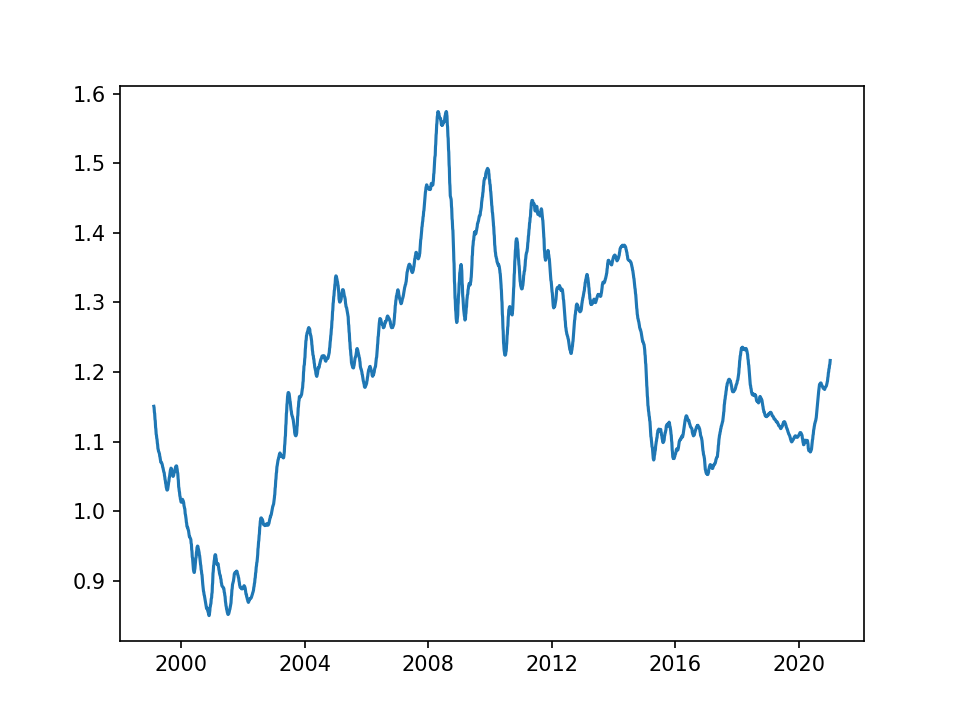

In [8]:
euro_to_us['each_month'] =euro_to_us['US_dollar'].rolling(window=30).mean()
#the difference of exchange rate of each day is too small and the number of day is big so that we cannot see the trend of 
#exchange rate. We can calculate the mean of the rate once a month to analyse and find out their effects 
plt.plot(euro_to_us['time'], euro_to_us['each_month'])
plt.show()

Now we will investigate how the financial crisis affects on the exchange rate of Euro and US dollar

In [9]:
euro_to_us['year'] = euro_to_us['time'].dt.year
print(euro_to_us['year'][1:5])

5697    1999
5696    1999
5695    1999
5694    1999
Name: year, dtype: int64


In [10]:
euro_to_us_crisis = euro_to_us[(euro_to_us['year'] >=2007) & (euro_to_us['year'] <=2008)]
euro_to_us_compare = euro_to_us[(euro_to_us['year'] >=2006) & (euro_to_us['year'] <=2009)]
print(euro_to_us_compare.head())

           time US_dollar  each_month  year
3873 2006-01-02    1.1826    1.183087  2006
3872 2006-01-03    1.1875    1.183300  2006
3871 2006-01-04    1.2083    1.184573  2006
3870 2006-01-05    1.2088    1.185613  2006
3869 2006-01-06    1.2093    1.186647  2006


<IPython.core.display.Javascript object>


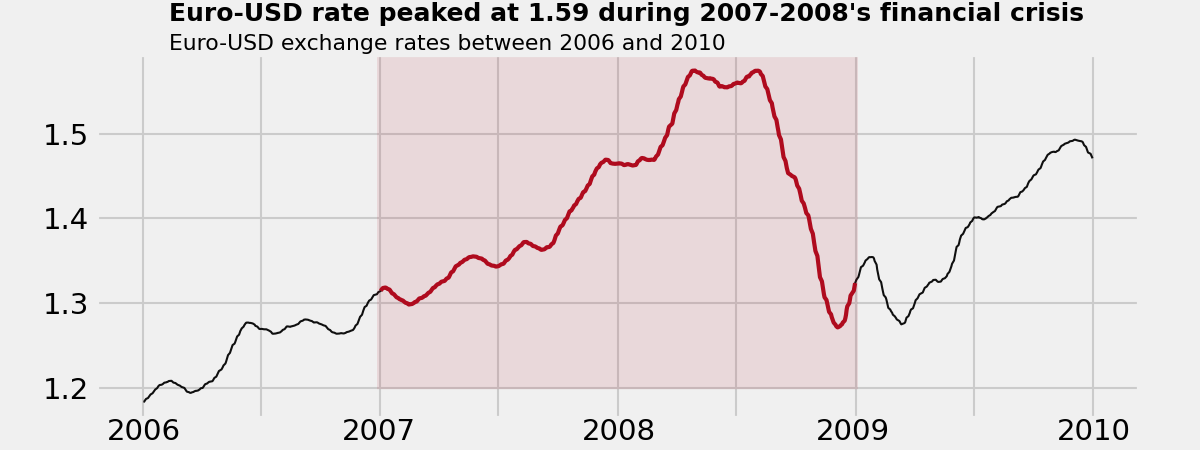

In [35]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(euro_to_us_compare['time'], euro_to_us_compare['each_month'], color='#0f0f0f', linewidth=1)
ax.plot(euro_to_us_crisis['time'], euro_to_us_crisis['each_month'], color='#af0b1e', linewidth=2)

ax.set_xticklabels([]) 
# the labels of x-axes include the year and month so that we need delete to make it clear
ax.text(0.01, -0.06, '2006', transform=ax.transAxes)
ax.text(0.2355, -0.06, '2007', transform=ax.transAxes)
ax.text(0.465, -0.06, '2008', transform=ax.transAxes)
ax.text(0.69, -0.06, '2009', transform=ax.transAxes)
ax.text(0.92, -0.06, '2010', transform=ax.transAxes)
#add comment and title
ax.text(0.07, 1.09, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size = 12, transform = ax.transAxes )
ax.text(0.07, 1.01, 'Euro-USD exchange rates between 2006 and 2010',
        size = 10.5, transform= ax.transAxes )
ax.axhline(y=1.5, xmin = 0.269, xmax = 0.73, linewidth = 245, color='#af0b1e', alpha=0.1)

plt.show()


We can see that during financial crisis the value of US dollar decreased significantly compare to Euro. Euro peaked in value at an exchange rate of £1.00:$ 1.59. This is because financial assets of some of the US-based bankers suffered defaults and the asset bubble went bust anf the value of USD dropped.

